In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/697/data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [3]:
df.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
continuous_columns = [
    "Previous qualification (grade)",
    "Admission grade",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

means = df[continuous_columns].mean()
stds = df[continuous_columns].std()
df[continuous_columns] = (df[continuous_columns] - means) / stds

other_columns = df.columns.drop(continuous_columns)
other_columns = other_columns.drop('Target')
df[other_columns] = df[other_columns] / df[other_columns].max()

In [5]:
# Logistic Regression
df1 = df.copy()
target_map = {'Dropout': 0, 'Enrolled': 0, 'Graduate': 1}
df1['Target'] = df1['Target'].map(target_map)

# Softmax Regression
df2 = df.copy()
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df2['Target'] = df2['Target'].map(target_map)

# Assignment 1

In [6]:
X = df1.drop('Target', axis=1).values
y = df1['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
class myLogisticRegression:
  def __init__(self, epoch: int, lr: float) -> None:
    self.epoch = epoch
    self.lr = lr
    self.losses = []
    self.metrics = []
    self.w = None
    self.b = None

  def sigmoid(self, z: np.ndarray) -> np.array:
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

  def loss_fn(self, y: np.array, y_hat: np.array) -> float:
    eps = 1e-9
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

  def accuracy(self, y: np.array, y_hat: np.array) -> float:
    preds = (y_hat >= 0.5).astype(int)
    return np.mean(preds == y)

  def fit(self, X: np.ndarray, y: np.array) -> None:
    n, d = X.shape

    if y.ndim == 1:
      y = y.reshape(-1, 1)

    self.w = np.zeros((d, 1))
    self.b = 0.0

    with tqdm(range(self.epoch)) as pb:
      for e in pb:
        pb.set_description(f"Epoch {e+1}")

        y_hat = self.predict(X)

        diff = y_hat - y
        dw = (1 / n) * (X.T @ diff)
        db = (1 / n) * np.sum(diff)

        self.w -= self.lr * dw
        self.b -= self.lr * db

        y_hat_new = self.predict(X)
        loss = self.loss_fn(y, y_hat_new)
        acc = self.accuracy(y, y_hat_new)

        pb.set_postfix({
          "loss": loss,
          "acc": acc
        })

        self.losses.append(loss)
        self.metrics.append(acc)

  def predict(self, X: np.ndarray) -> np.array:
    z = X @ self.w + self.b
    y_hat = self.sigmoid(z)
    return y_hat

In [8]:
logistic_reg = myLogisticRegression(1000, 0.01)
logistic_reg.fit(X_train, y_train.reshape(-1, 1))

Epoch 1000: 100%|██████████| 1000/1000 [00:04<00:00, 237.12it/s, loss=0.572, acc=0.754]


<Axes: >

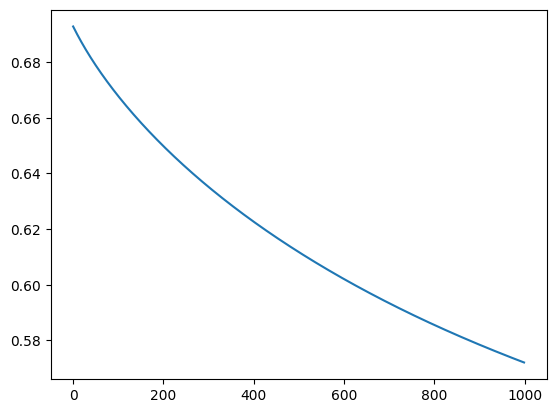

In [9]:
sns.lineplot(logistic_reg.losses)

<Axes: >

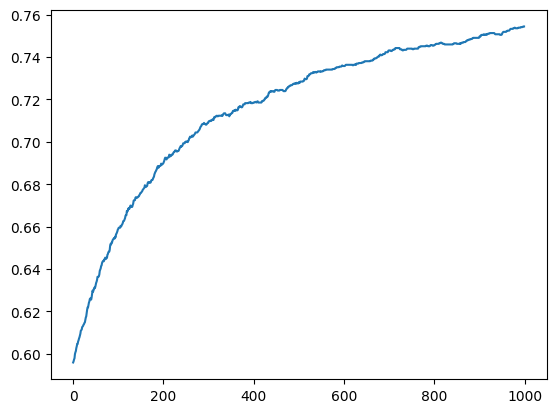

In [10]:
sns.lineplot(logistic_reg.metrics)

In [11]:
y_hat_test = logistic_reg.predict(X_test)
test_acc = logistic_reg.accuracy(y_test.reshape(-1, 1), y_hat_test)
test_acc

np.float64(0.7435028248587571)

# Assignment 2

In [12]:
X = df2.drop('Target', axis=1).values
y = df2['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
encoded_y_train = np.zeros((y_train.shape[0], 3))
encoded_y_train[y_train == 0] = np.array([1, 0, 0])
encoded_y_train[y_train == 1] = np.array([0, 1, 0])
encoded_y_train[y_train == 2] = np.array([0, 0, 1])

In [14]:
class mySoftmaxRegression:
  def __init__(self, epoch: int, lr: float) -> None:
    self.epoch = epoch
    self.lr = lr
    self.losses = []
    self.metrics = []
    self.theta = None
    self.b = None

  def softmax(self, z: np.ndarray) -> np.array:
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

  def loss_fn(self, y: np.array, y_hat: np.array) -> float:
    return -np.mean((y * np.log(y_hat + 1e-9)).sum(axis=-1))

  def accuracy(self, y: np.array, y_hat: np.array) -> float:
    return np.mean(y == y_hat)

  def fit(self, X: np.ndarray, y: np.array) -> None:
    n = X.shape[0]
    d = X.shape[1]
    n_classes = y.shape[-1]

    self.theta = np.zeros((d, n_classes))
    self.b = np.zeros((1, n_classes))

    with tqdm(range(self.epoch)) as pb:
      for e in pb:
        pb.set_description(f"Epoch {e+1}")

        s = self.predict(X)
        s_c = s - y

        gradient_theta = (1/n) * (X.T @ s_c)
        gradient_b = (1/n) * np.sum(s_c, axis=0, keepdims=True)

        self.theta -= self.lr * gradient_theta
        self.b -= self.lr * gradient_b

        s_updated = self.predict(X)
        loss = self.loss_fn(y, s_updated)

        y_labels = y.argmax(axis=-1)
        s_labels = s_updated.argmax(axis=-1)
        acc = self.accuracy(y_labels, s_labels)

        pb.set_postfix({
          "loss": loss,
          "acc": acc
        })
        self.losses.append(loss)
        self.metrics.append(acc)

  def predict(self, X: np.ndarray) -> np.array:
    z = X @ self.theta + self.b
    y_hat = self.softmax(z)
    return y_hat

In [15]:
softmax_reg = mySoftmaxRegression(1000, 0.01)
softmax_reg.fit(X_train, encoded_y_train)

Epoch 1000: 100%|██████████| 1000/1000 [00:06<00:00, 146.37it/s, loss=0.821, acc=0.686]


<Axes: >

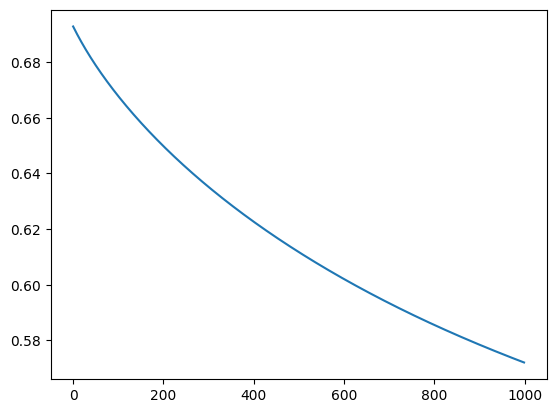

In [16]:
sns.lineplot(logistic_reg.losses)

<Axes: >

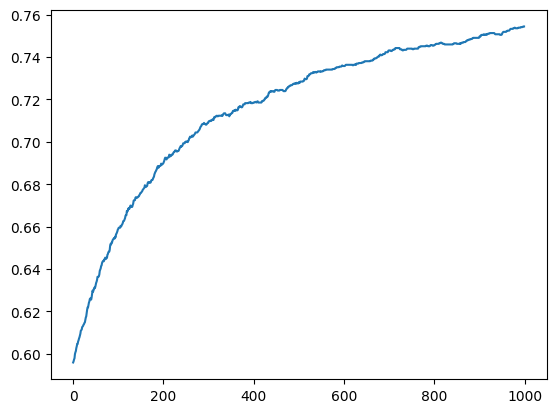

In [17]:
sns.lineplot(logistic_reg.metrics)

In [18]:
y_hat_test = softmax_reg.predict(X_test)
y_hat_test.shape

(885, 3)

In [19]:
y_pred_test = y_hat_test.argmax(axis=-1)
y_pred_test.shape

(885,)

In [20]:
softmax_reg.accuracy(y_test, y_pred_test)

np.float64(0.6757062146892655)

# Assignment 3

Logistic Regression

In [21]:
X = df1.drop('Target', axis=1).values
y = df1['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy_score(y_test, y_pred)

0.831638418079096

Softmax Regression

In [23]:
X = df2.drop('Target', axis=1).values
y = df2['Target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
sr = LogisticRegression(max_iter=500)
sr.fit(X_train, y_train)
y_pred = sr.predict(X_test)

accuracy_score(y_test, y_pred)

0.7502824858757062